<a href="https://colab.research.google.com/github/chandy07/Tugas-Semester-4/blob/main/UTS_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
import io
import seaborn as sns

uploaded = files.upload()
filename = list(uploaded.keys())[0]

data = pd.read_csv(io.BytesIO(uploaded[filename]))
data.head()

Saving Titanic-Dataset.csv to Titanic-Dataset (4).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
total_passengers = data.shape[0]
print("Jumlah total penumpang:", total_passengers)

Jumlah total penumpang: 891


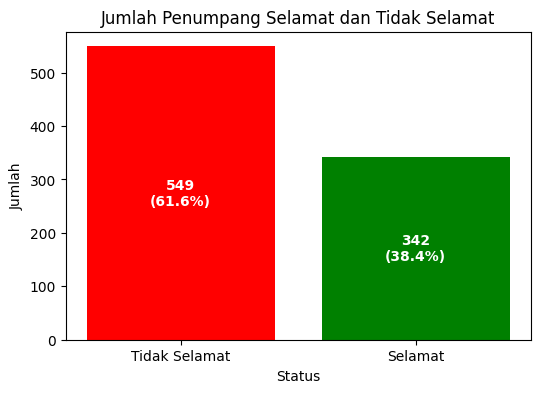

In [ ]:
survival_counts = data['Survived'].value_counts().sort_index()
labels = ['Tidak Selamat', 'Selamat']
colors = ['red', 'green']
percentages = survival_counts / survival_counts.sum() * 100

plt.figure(figsize=(6,4))
bars = plt.bar(labels, survival_counts, color=colors)
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah')
plt.xlabel('Status')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,
             f'{survival_counts[i]}\n({percentages[i]:.1f}%)',
             ha='center', va='center', color='white', fontweight='bold')

plt.show()

In [ ]:
avg_age = data['Age'].mean()
print(f"Rata-rata umur penumpang: {avg_age:.2f} tahun")

youngest = data.loc[data['Age'].idxmin()]
print("Penumpang termuda:", youngest['Name'], "| Umur:", youngest['Age'])

oldest = data.loc[data['Age'].idxmax()]
print("Penumpang tertua:", oldest['Name'], "| Umur:", oldest['Age'])

Rata-rata umur penumpang: 29.70 tahun
Penumpang termuda: Thomas, Master. Assad Alexander | Umur: 0.42
Penumpang tertua: Barkworth, Mr. Algernon Henry Wilson | Umur: 80.0


<ipython-input-40-4fe480de9903>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=gender_df, x='Sex', y='Count', palette='pastel', legend=False)


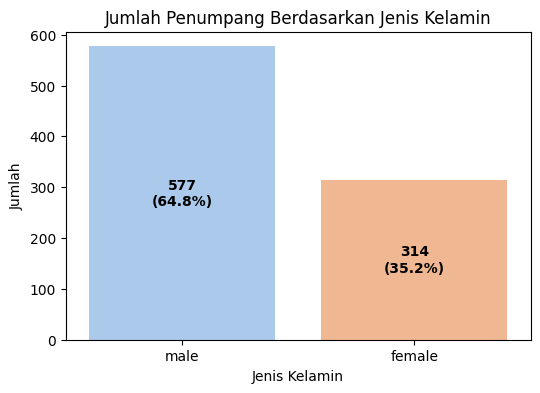

In [ ]:
gender_counts = data['Sex'].value_counts()
gender_percent = gender_counts / gender_counts.sum() * 100

gender_df = pd.DataFrame({
    'Sex': gender_counts.index,
    'Count': gender_counts.values,
    'Percent': gender_percent.values
})

plt.figure(figsize=(6,4))
bars = sns.barplot(data=gender_df, x='Sex', y='Count', palette='pastel', legend=False)
plt.title("Jumlah Penumpang Berdasarkan Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,
             f'{int(height)}\n({gender_df["Percent"].iloc[i]:.1f}%)',
             ha='center', va='center', color='black', fontweight='bold')

plt.show()

<ipython-input-41-864edae526c9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=class_df, x='Pclass', y='Count', palette='Set2', legend=False)


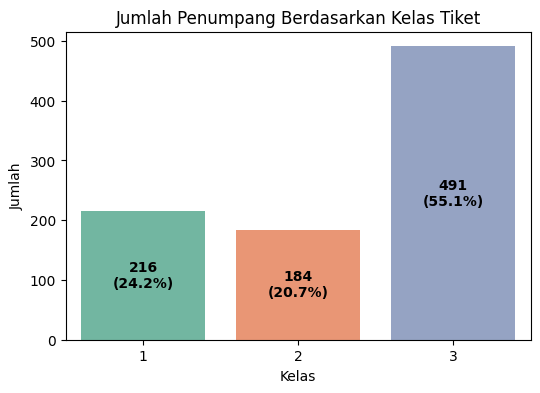

Persentase penumpang di kelas 1: 24.24%


In [ ]:
class_counts = data['Pclass'].value_counts().sort_index()
class_percent = class_counts / class_counts.sum() * 100

class_df = pd.DataFrame({
    'Pclass': class_counts.index.astype(str),
    'Count': class_counts.values,
    'Percent': class_percent.values
})

plt.figure(figsize=(6,4))
bars = sns.barplot(data=class_df, x='Pclass', y='Count', palette='Set2', legend=False)
plt.title("Jumlah Penumpang Berdasarkan Kelas Tiket")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,
             f'{int(height)}\n({class_df["Percent"].iloc[i]:.1f}%)',
             ha='center', va='center', color='black', fontweight='bold')

plt.show()

percent_class1 = class_df[class_df['Pclass'] == '1']['Percent'].values[0]
print(f"Persentase penumpang di kelas 1: {percent_class1:.2f}%")

In [ ]:
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
Age,177
Cabin,687
Embarked,2


In [44]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

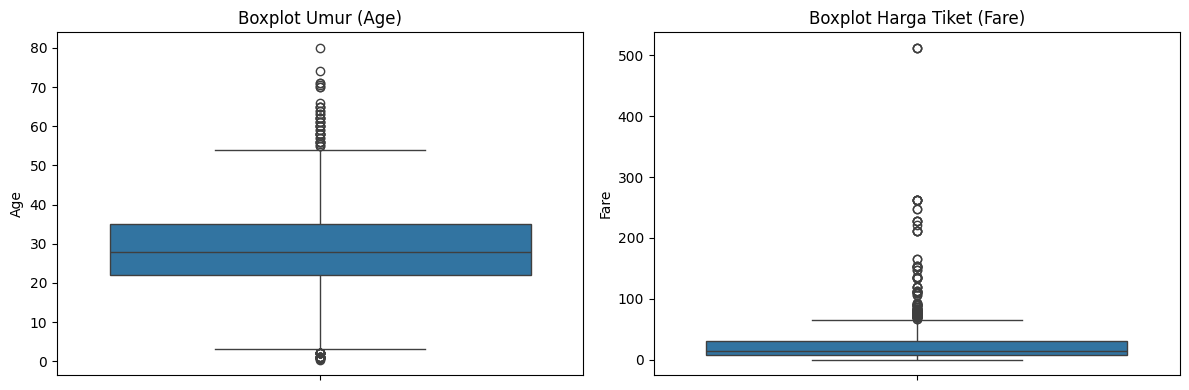

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
sns.boxplot(data['Age'])
plt.title('Boxplot Umur (Age)')

plt.subplot(1, 2, 2)
sns.boxplot(data['Fare'])
plt.title('Boxplot Harga Tiket (Fare)')

plt.tight_layout()
plt.show()

In [47]:
import numpy as np

fare_cap = data['Fare'].quantile(0.95)
data['Fare'] = np.where(data['Fare'] > fare_cap, fare_cap, data['Fare'])

In [48]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age', 'Fare']
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])
data[num_features].head()

,Age,Fare
0,-0.565736,-0.700836
1,0.663861,1.491434
2,-0.258337,-0.677726
3,0.433312,0.868903
4,0.433312,-0.673447


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

X = X.copy()
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

model_logreg = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)

model_logreg.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred_logreg = model_logreg.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

print("🔸 Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

print("\n🔸 Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\n🔸 K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


🔸 Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.8044692737430168

🔸 Random Forest
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212290502793296

🔸 K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro

In [53]:
from sklearn.metrics import classification_report

y_pred = model_rf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f'🔹 Precision untuk penumpang yang selamat: {precision_selamat:.2f}')
print(f'🔹 Recall untuk penumpang yang selamat: {recall_selamat:.2f}')

🔹 Precision untuk penumpang yang selamat: 0.80
🔹 Recall untuk penumpang yang selamat: 0.76


In [55]:
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
predicted_selamat = sum(y_pred == 1)
benar_selamat = cm[1, 1]

print(f'Jumlah penumpang yang diprediksi selamat: {predicted_selamat}')
print(f'Jumlah yang benar-benar selamat dari prediksi tersebut: {benar_selamat}')

Jumlah penumpang yang diprediksi selamat: 70
Jumlah yang benar-benar selamat dari prediksi tersebut: 56
